This notebook contains code to train a linear classifier on MNIST. At the end is a short exercise.

In [23]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
sess = None
def ResetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()

Import the dataset

In [5]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Train, validation, test: 55000, 5000, 10000
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
784


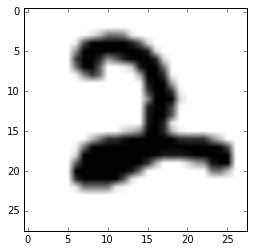

In [25]:
# Uncomment these lines to understand the format of the dataset.

## 1. How many examples do we have?
print ('Train, validation, test: %d, %d, %d' % 
      (len(mnist.train.images), len(mnist.validation.images), len(mnist.test.images)))

## 2. What's the format of a label? Notice they're "one-hot".
print (mnist.train.labels[0])

## 3. What's the format of an image? 
# They're a "flattened" array of 28*28 = 784 pixels.
print (len(mnist.train.images[0]))

## 4. How can you display an image?
plt.imshow(mnist.train.images[0].reshape((28,28)), cmap=plt.cm.gray_r)   
## Note: the first image is oddly drawn.

In [27]:
ResetSession()

NUM_CLASSES = 10
NUM_PIXELS = 28 * 28
TRAIN_STEPS = 1000
BATCH_SIZE = 100
LEARNING_RATE = 0.5

mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

# Placeholders for images and labels
# The first dimension is the batch size
# None means it can be of any length
# TensorFlow will infer it later
x = tf.placeholder(tf.float32, [None, NUM_PIXELS], name="pixels")
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES], name="labels")

# Define the model
W = tf.Variable(tf.zeros([NUM_PIXELS, NUM_CLASSES]), name="weights")
b = tf.Variable(tf.zeros([NUM_CLASSES]), name="biases")
y = tf.matmul(x, W) + b

# Write a summary of the graph (before we add the loss and optimizer)
# Which will add a bunch of nodes automatically
sw = tf.train.SummaryWriter('summaries/', graph=tf.get_default_graph())
sw.close()

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

# Initialize variables after the model is defined
sess.run(tf.initialize_all_variables())

# Train the model
for i in range(TRAIN_STEPS):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Evaluate the trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                                  
print("Accuracy %f" % sess.run(accuracy, feed_dict={x: mnist.test.images, 
                                                    y_: mnist.test.labels}))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Accuracy 0.920200


In [30]:
#print(len(mnist.train.images), len(mnist.validation.images), len(mnist.test.images))
#print(mnist.train.labels[:10])
#print([np.argmax(r) for r in mnist.train.labels[:10]])
#print(np.shape(mnist.train.images[0]))

#plt.imshow(mnist.train.images[4].reshape((28,28)), cmap=plt.cm.gray_r)

ResetSession()

NUM_CLASSES = 10
NUM_PIXELS = 28*28
TRAIN_STEPS = 1000
BATCH_SIZE = 100
LEARNING_RATE = 0.5

mist = input_data.read_data_sets("/tmp/data", one_hot=True)

x = tf.placeholder(dtype = tf.float32, shape=[None, NUM_PIXELS], name = "pixels")
y_ = tf.placeholder(dtype = tf.float32, shape = [None, NUM_CLASSES], name = "labels")

W = tf.Variable(tf.zeros([NUM_PIXELS, NUM_CLASSES]), name = "weights")
b = tf.Variable(tf.zeros([NUM_CLASSES]), name = "offset")
y = tf.add(tf.matmul(x, W),b)

summary_writer = tf.train.SummaryWriter("summaries/", graph=tf.get_default_graph())
summary_writer.close()

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

sess.run(tf.initialize_all_variables())

for i in range(TRAIN_STEPS):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
    sess.run(train_step, feed_dict = {y_: batch_ys, x:batch_xs})
    
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Accuracy is %f"%(sess.run(accuracy, feed_dict={y_:mnist.test.labels, x:mnist.test.images})))
    

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Accuracy is 0.914400


prediction is  [7] , label is  7
prediction is  [2] , label is  2
prediction is  [1] , label is  1
prediction is  [0] , label is  0
prediction is  [4] , label is  4
prediction is  [1] , label is  1
prediction is  [4] , label is  4
prediction is  [9] , label is  9
prediction is  [6] , label is  5
prediction is  [9] , label is  9


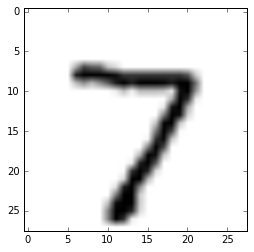

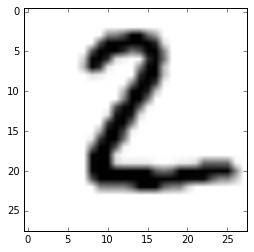

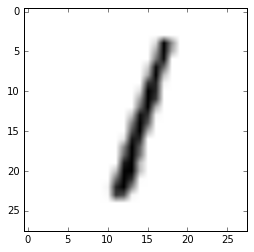

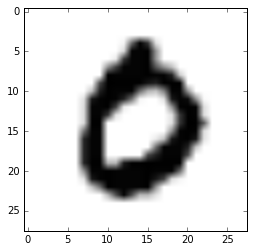

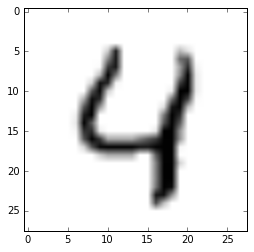

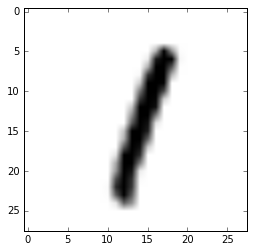

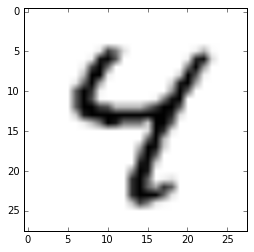

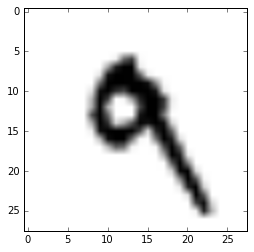

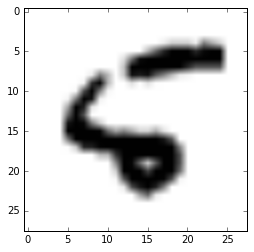

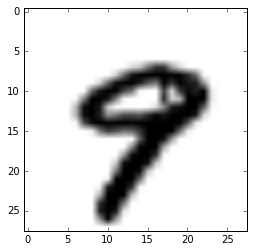

In [77]:
def predict_and_check(idx, fig):    
    x_in = mnist.test.images[idx]
    print("prediction is ", sess.run(tf.argmax(y, 1), feed_dict={x:x_in.reshape(1, 784)}), 
          ", label is ", np.argmax(mnist.test.labels[idx]))
    #print(sess.run(y, feed_dict={x:x_in.reshape(1, 784)}))
    #print("labels are ", mnist.test.labels[idx])
    #print("here's the actual image:")

    plt.imshow(mnist.test.images[idx].reshape((28,28)), cmap=plt.cm.gray_r)
    
for idx in range(10):
    fig = plt.figure(idx)
    predict_and_check(idx, fig)

### Exercise
As written, the above code evaluates the accuracy of the trained model on the entire testing set. Can you write a function to predict the label for a single image from the testing set? Your function should display the image, the correct label, and the predicted label. 

Tip: keep in mind the placeholders expect 2d arrays.

prediction is  [7] , label is  7
prediction is  [2] , label is  2
prediction is  [1] , label is  1
prediction is  [0] , label is  0
prediction is  [4] , label is  4
prediction is  [1] , label is  1
prediction is  [4] , label is  4
prediction is  [9] , label is  9
prediction is  [6] , label is  5
prediction is  [9] , label is  9


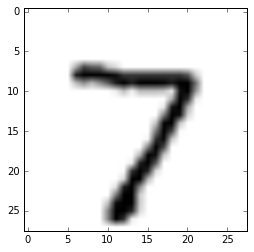

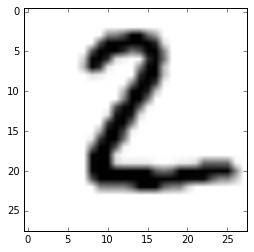

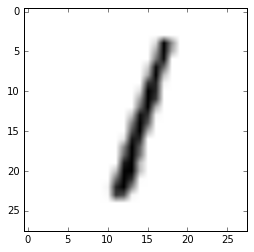

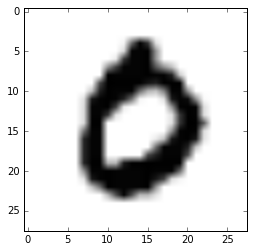

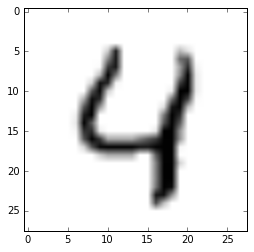

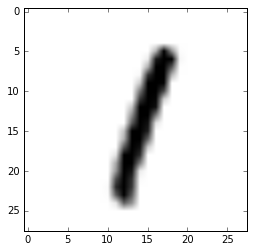

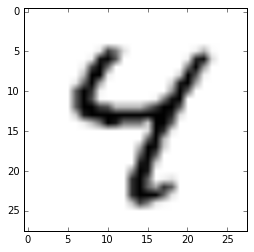

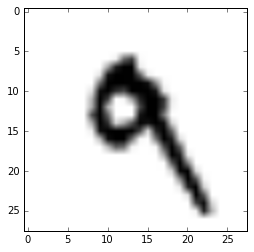

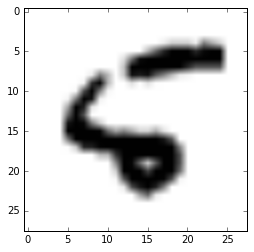

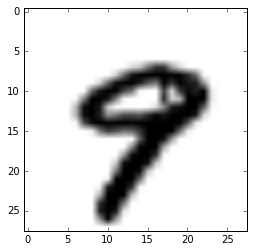

In [78]:
# put your solution here
def predict_and_check(idx, fig):    
    x_in = mnist.test.images[idx]
    print("prediction is ", sess.run(tf.argmax(y, 1), feed_dict={x:x_in.reshape(1, 784)}), 
          ", label is ", np.argmax(mnist.test.labels[idx]))
    #print(sess.run(y, feed_dict={x:x_in.reshape(1, 784)}))
    #print("labels are ", mnist.test.labels[idx])
    #print("here's the actual image:")

    plt.imshow(mnist.test.images[idx].reshape((28,28)), cmap=plt.cm.gray_r)
    
for idx in range(10):
    fig = plt.figure(idx)
    predict_and_check(idx, fig)